C:\Users\kjm99\anaconda3\envs\tensorFlow_test\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
469/469 - 6s - 12ms/step - accuracy: 0.9343 - loss: 0.2116 - val_accuracy: 0.9800 - val_loss: 0.0624
Epoch 2/30
469/469 - 5s - 10ms/step - accuracy: 0.9831 - loss: 0.0552 - val_accuracy: 0.9875 - val_loss: 0.0366
Epoch 3/30
469/469 - 5s - 10ms/step - accuracy: 0.9883 - loss: 0.0376 - val_accuracy: 0.9874 - val_loss: 0.0376
Epoch 4/30
469/469 - 4s - 9ms/step - accuracy: 0.9906 - loss: 0.0291 - val_accuracy: 0.9900 - val_loss: 0.0314
Epoch 5/30
469/469 - 4s - 9ms/step - accuracy: 0.9924 - loss: 0.0240 - val_accuracy: 0.9901 - val_loss: 0.0295
Epoch 6/30
469/469 - 4s - 9ms/step - accuracy: 0.9938 - loss: 0.0191 - val_accuracy: 0.9905 - val_loss: 0.0266
Epoch 7/30
469/469 - 4s - 9ms/step - accuracy: 0.9952 - loss: 0.0154 - val_accuracy: 0.9884 - val_loss: 0.0374
Epoch 8/30
469/469 - 4s - 9ms/step - accuracy: 0.9956 - loss: 0.0136 - val_accuracy: 0.9894 - val_loss: 0.0352
Epoch 9/30
469/469 - 4s - 9ms/step - accuracy: 0.9959 - loss: 0.0127 - val_accuracy: 0.9877 - val_loss: 0.040

C:\Users\kjm99\anaconda3\envs\tensorFlow_test\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kjm99\anaconda3\envs\tensorFlow_test\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


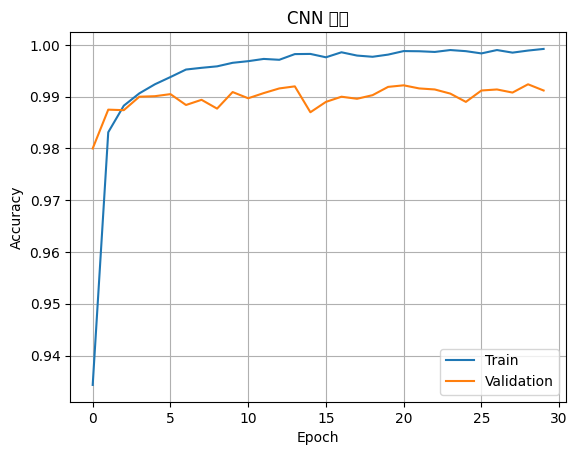

In [1]:
# 01_CNN_ienet.py

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_copy = np.copy(x_test[:10])
x_train = x_train.reshape(60000,28,28,1)     
x_test = x_test.reshape(10000,28,28,1)

x_train = x_train.astype(np.float32)/255.0 
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train,10) 
y_test = tf.keras.utils.to_categorical(y_test,10)

cnn = Sequential()
cnn.add(Conv2D(6,(5,5),padding='same', activation='relu',
                     input_shape=(28,28,1)))
cnn.add(MaxPooling2D(pool_size=(2,2))) 
cnn.add(Conv2D(16,(5,5),padding='same', activation='relu')) 
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(120,(5,5),padding='same', activation='relu')) 
cnn.add(Flatten())

cnn.add(Dense(84, activation='relu'))
cnn.add(Dense(10, activation='softmax'))

cnn.compile(loss='categorical_crossentropy',
            optimizer=Adam(), metrics=['accuracy'])

hist = cnn.fit(x_train,y_train,batch_size=128,epochs=30,
               validation_data=(x_test,y_test),verbose=2)

res = cnn.evaluate(x_test,y_test,verbose=0)
print("CNN을 사용했을때의 정확율 = ", res[1]*100)

cnn.save("hst_LeNet5_mnist_model.keras")


# 정확율 곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

plt.title('CNN 결과')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

In [2]:
# 02_CNN_CCPFCFC.py

import numpy as np
import tensorflow as tf
import tensorflow.keras.datasets.mnist as mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

cnn = Sequential()

cnn.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
cnn.add(Conv2D(64,(3,3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

cnn.summary()

cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
hist = cnn.fit(x_train, y_train, batch_size=128, epochs=12, verbose=2, validation_data=(x_test, y_test))

result = cnn.evaluate(x_test, y_test, verbose=0)
print('CCPFCFC을 사용했을때의 정확률:', result[1]*100)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,179,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,199,882 (4.58 MB)

 Trainable params: 1,199,882 (4.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
469/469 - 18s - 38ms/step - accuracy: 0.9269 - loss: 0.2405 - val_accuracy: 0.9810 - val_loss: 0.0577
Epoch 2/12
469/469 - 17s - 37ms/step - accuracy: 0.9747 - loss: 0.0879 - val_accuracy: 0.9871 - val_loss: 0.0371
Epoch 3/12
469/469 - 17s - 36ms/step - accuracy: 0.9808 - loss: 0.0639 - val_accuracy: 0.9880 - val_loss: 0.0345
Epoch 4/12
469/469 - 17s - 37ms/step - accuracy: 0.9843 - loss: 0.0518 - val_accuracy: 0.9895 - val_loss: 0.0352
Epoch 5/12
469/469 - 17s - 36ms/step - accuracy: 0.9858 - loss: 0.0456 - val_accuracy: 0.9892 - val_loss: 0.0295
Epoch 6/12
469/469 - 18s - 38ms/step - accuracy: 0.9874 - loss: 0.0389 - val_accuracy: 0.9909 - val_loss: 0.0281
Epoch 7/12
469/469 - 16s - 35ms/step - accuracy: 0.9894 - loss: 0.0340 - val_accuracy: 0.9909 - val_loss: 0.0288
Epoch 8/12
469/469 - 17s - 36ms/step - accuracy: 0.9903 - loss: 0.0312 - val_accuracy: 0.9915 - val_loss: 0.0267
Epoch 9/12
469/469 - 17s - 36ms/step - accuracy: 0.9911 - loss: 0.0280 - val_accuracy: 0.9909 - 